## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [10]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings


from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/stud.csv')

#### Show Top 5 Records

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### ✅ Correct Order of Data Preprocessing:
### 1️⃣ Remove Duplicates
### 2️⃣ Handle Missing Values
### 3️⃣ Handle Outliers
### 4️⃣ Split X (features) and y (target)
### 5️⃣ Standardize and Encode Data
### 6️⃣ Split into Train & Test Sets

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 1️⃣ Remove Duplicates

In [28]:
df.duplicated().sum()

0

In [5]:
df = df.drop_duplicates()

### 2️⃣ Handle Missing Values

In [29]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [30]:
num_features = df.select_dtypes(exclude="object").columns
cat_features = df.select_dtypes(include="object").columns

In [33]:
print(num_features)
print(cat_features)

Index(['math_score', 'reading_score', 'writing_score'], dtype='object')
Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')


In [34]:
num_imputer = SimpleImputer(strategy="median")  # Fill numerical with median
cat_imputer = SimpleImputer(strategy="most_frequent")  # Fill categorical with mode

In [35]:
df[num_features] = num_imputer.fit_transform(df[num_features])
df[cat_features] = cat_imputer.fit_transform(df[cat_features])

### 3️⃣ Handle Outliers

In [36]:
def remove_outliers(df, num_cols):
    Q1 = df[num_cols].quantile(0.25)
    Q3 = df[num_cols].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[~((df[num_cols] < lower_bound) | (df[num_cols] > upper_bound)).any(axis=1)]



In [37]:
df = remove_outliers(df, num_features)

### 4️⃣ Split X (features) and y (target)

In [38]:
X = df.drop(columns=['math_score'], axis=1)  # Features
y = df['math_score']  # Target variable

### 5️⃣ Standardize and Encode Data

In [15]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [39]:
X_transformed = preprocessor.fit_transform(X)

In [41]:
print(X_transformed.shape)
print(y.shape)

(986, 19)
(986,)


### 6️⃣ Split into Train & Test Sets

In [42]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_transformed,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((788, 19), (198, 19))

### 🚀 Model Training

### 📌 Create an Evaluate Function to give all metrics after model Training

In [21]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from rich.console import Console
from rich.table import Table
from rich import box

console = Console()

def evaluate_model(true, predicted):
    # Calculate metrics
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true, predicted)

    # Display Results in a Beautiful Table
    table = Table(title="📊 Model Evaluation Metrics", box=box.MINIMAL_DOUBLE_HEAD)
    table.add_column("Metric", style="bold cyan")
    table.add_column("Value", style="bold green")

    table.add_row("Mean Absolute Error (MAE)", f"{mae:.4f}")
    table.add_row("Root Mean Squared Error (RMSE)", f"{rmse:.4f}")
    table.add_row("R² Score", f"{r2_square:.4f}")

    console.print(table)

    # Plot Actual vs Predicted
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=true, y=predicted, color="blue", label="Predicted vs Actual")
    plt.plot([min(true), max(true)], [min(true), max(true)], color='red', linestyle='dashed', label="Ideal Fit")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("📊 Actual vs Predicted Plot")
    plt.legend()
    plt.grid()
    plt.show()

    return mae, rmse, r2_square


In [45]:
import warnings
warnings.simplefilter("ignore", UserWarning)


### 🏋️‍♂️ Training Models


🛠️ Training Model: Linear Regression 🚀

📊 Evaluating Training Performance 🔍

        📊 Model Evaluation Metrics        
                                 ╷         
  Metric                         │ Value   
 ════════════════════════════════╪════════ 
  Mean Absolute Error (MAE)      │ 4.2215  
  Root Mean Squared Error (RMSE) │ 5.2681  
  R² Score                       │ 0.8629  
                                 ╵

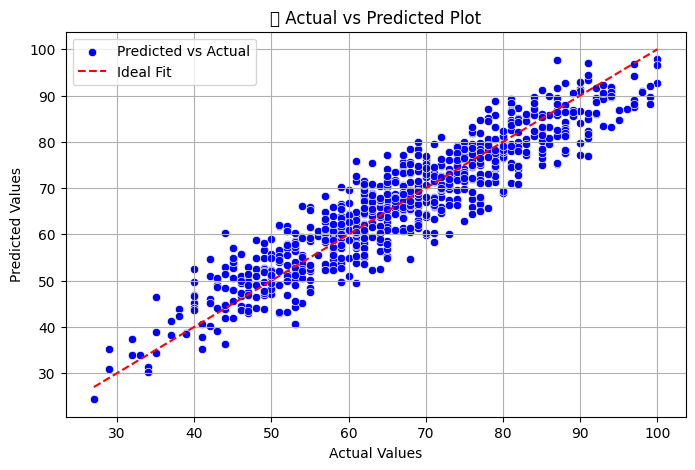

📊 Evaluating Test Performance 🔍

        📊 Model Evaluation Metrics        
                                 ╷         
  Metric                         │ Value   
 ════════════════════════════════╪════════ 
  Mean Absolute Error (MAE)      │ 4.3395  
  Root Mean Squared Error (RMSE) │ 5.5748  
  R² Score                       │ 0.8569  
                                 ╵

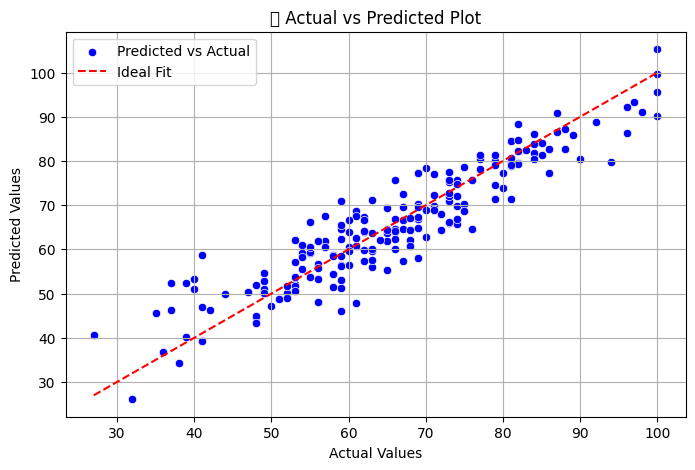

📌 Model Performance: Linear Regression
           ╷             ╷             
  Metric   │ Train Value │ Test Value  
 ══════════╪═════════════╪════════════ 
  MAE      │ 4.2215      │ 4.3395      
  RMSE     │ 5.2681      │ 5.5748      
  R² Score │ 0.8629      │ 0.8569      
           ╵             ╵

✅ Model Evaluation Complete! 🎯

==================================================

🛠️ Training Model: Lasso 🚀

📊 Evaluating Training Performance 🔍

        📊 Model Evaluation Metrics        
                                 ╷         
  Metric                         │ Value   
 ════════════════════════════════╪════════ 
  Mean Absolute Error (MAE)      │ 5.2635  
  Root Mean Squared Error (RMSE) │ 6.5974  
  R² Score                       │ 0.7849  
                                 ╵

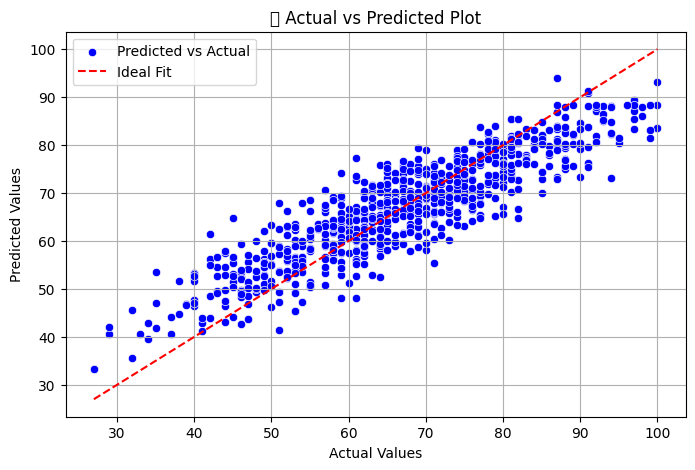

📊 Evaluating Test Performance 🔍

        📊 Model Evaluation Metrics        
                                 ╷         
  Metric                         │ Value   
 ════════════════════════════════╪════════ 
  Mean Absolute Error (MAE)      │ 5.2437  
  Root Mean Squared Error (RMSE) │ 6.7329  
  R² Score                       │ 0.7912  
                                 ╵

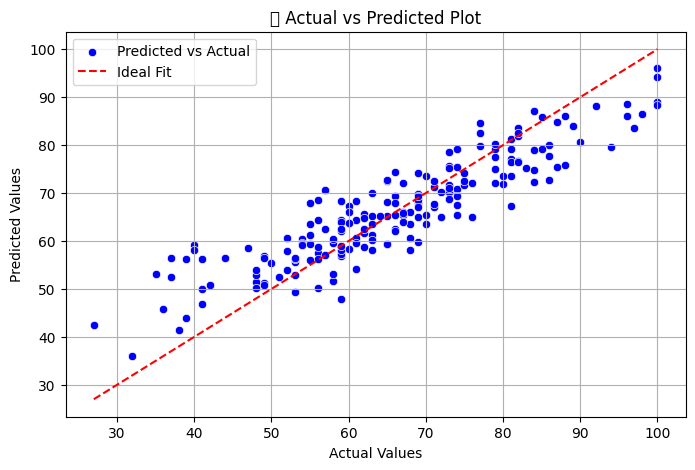

      📌 Model Performance: Lasso      
           ╷             ╷             
  Metric   │ Train Value │ Test Value  
 ══════════╪═════════════╪════════════ 
  MAE      │ 5.2635      │ 5.2437      
  RMSE     │ 6.5974      │ 6.7329      
  R² Score │ 0.7849      │ 0.7912      
           ╵             ╵

✅ Model Evaluation Complete! 🎯

==================================================

🛠️ Training Model: Ridge 🚀

📊 Evaluating Training Performance 🔍

        📊 Model Evaluation Metrics        
                                 ╷         
  Metric                         │ Value   
 ════════════════════════════════╪════════ 
  Mean Absolute Error (MAE)      │ 4.2202  
  Root Mean Squared Error (RMSE) │ 5.2683  
  R² Score                       │ 0.8628  
                                 ╵

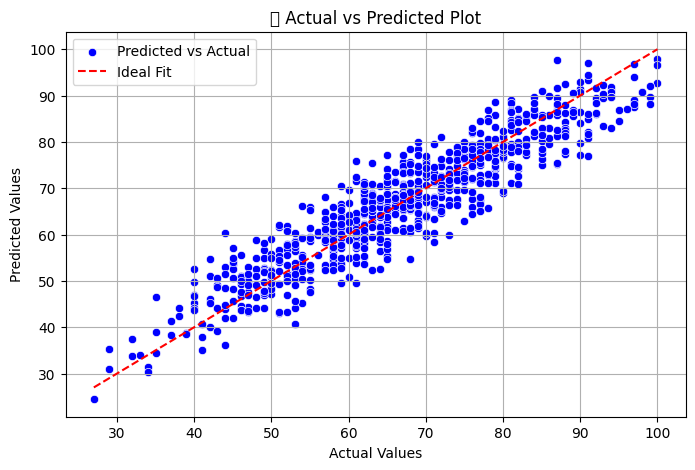

📊 Evaluating Test Performance 🔍

        📊 Model Evaluation Metrics        
                                 ╷         
  Metric                         │ Value   
 ════════════════════════════════╪════════ 
  Mean Absolute Error (MAE)      │ 4.3368  
  Root Mean Squared Error (RMSE) │ 5.5700  
  R² Score                       │ 0.8571  
                                 ╵

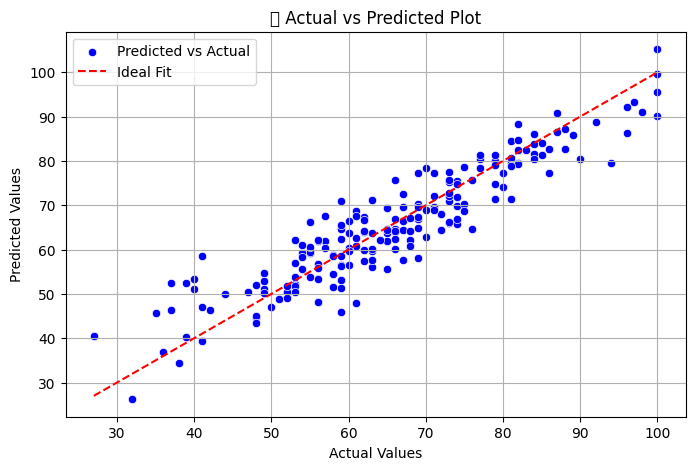

      📌 Model Performance: Ridge      
           ╷             ╷             
  Metric   │ Train Value │ Test Value  
 ══════════╪═════════════╪════════════ 
  MAE      │ 4.2202      │ 4.3368      
  RMSE     │ 5.2683      │ 5.5700      
  R² Score │ 0.8628      │ 0.8571      
           ╵             ╵

✅ Model Evaluation Complete! 🎯

==================================================

🛠️ Training Model: K-Neighbors Regressor 🚀

📊 Evaluating Training Performance 🔍

        📊 Model Evaluation Metrics        
                                 ╷         
  Metric                         │ Value   
 ════════════════════════════════╪════════ 
  Mean Absolute Error (MAE)      │ 4.5647  
  Root Mean Squared Error (RMSE) │ 5.6976  
  R² Score                       │ 0.8396  
                                 ╵

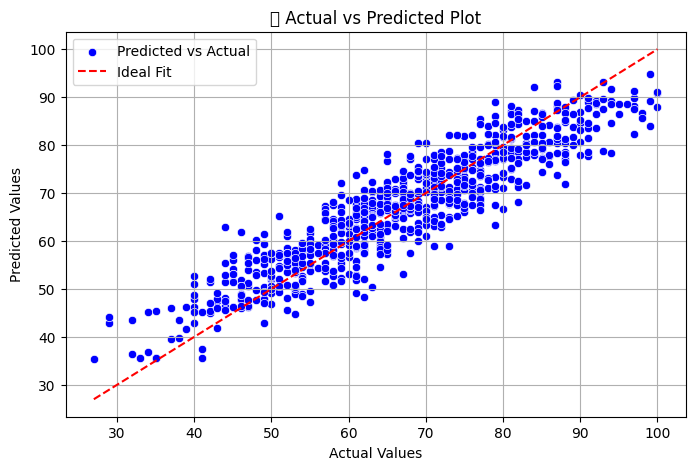

📊 Evaluating Test Performance 🔍

        📊 Model Evaluation Metrics        
                                 ╷         
  Metric                         │ Value   
 ════════════════════════════════╪════════ 
  Mean Absolute Error (MAE)      │ 5.5717  
  Root Mean Squared Error (RMSE) │ 6.9245  
  R² Score                       │ 0.7792  
                                 ╵

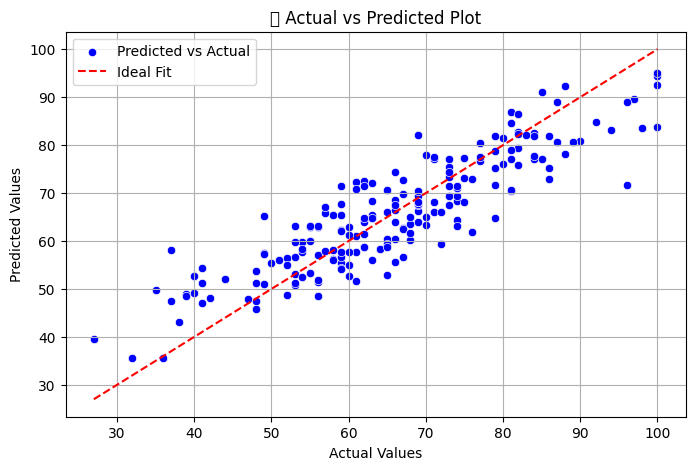

   📌 Model Performance: K-Neighbors   
               Regressor               
           ╷             ╷             
  Metric   │ Train Value │ Test Value  
 ══════════╪═════════════╪════════════ 
  MAE      │ 4.5647      │ 5.5717      
  RMSE     │ 5.6976      │ 6.9245      
  R² Score │ 0.8396      │ 0.7792      
           ╵             ╵

✅ Model Evaluation Complete! 🎯

==================================================

🛠️ Training Model: Decision Tree 🚀

📊 Evaluating Training Performance 🔍

        📊 Model Evaluation Metrics        
                                 ╷         
  Metric                         │ Value   
 ════════════════════════════════╪════════ 
  Mean Absolute Error (MAE)      │ 0.0266  
  Root Mean Squared Error (RMSE) │ 0.3778  
  R² Score                       │ 0.9993  
                                 ╵

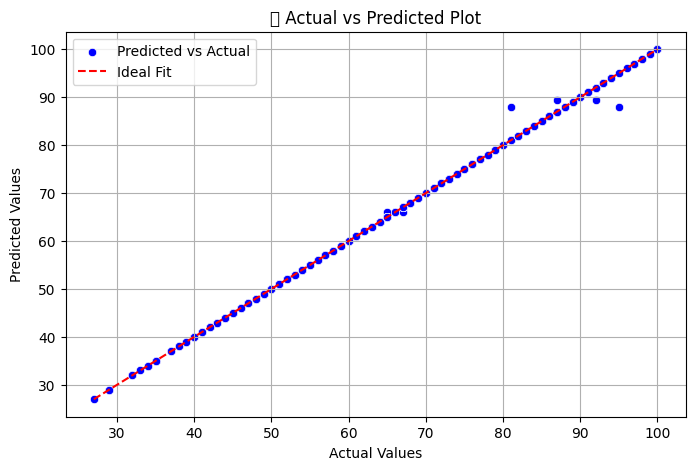

📊 Evaluating Test Performance 🔍

        📊 Model Evaluation Metrics        
                                 ╷         
  Metric                         │ Value   
 ════════════════════════════════╪════════ 
  Mean Absolute Error (MAE)      │ 5.9848  
  Root Mean Squared Error (RMSE) │ 7.8724  
  R² Score                       │ 0.7146  
                                 ╵

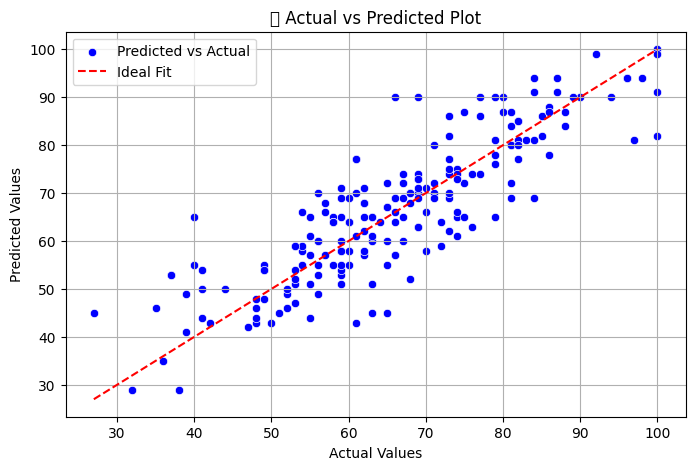

  📌 Model Performance: Decision Tree  
           ╷             ╷             
  Metric   │ Train Value │ Test Value  
 ══════════╪═════════════╪════════════ 
  MAE      │ 0.0266      │ 5.9848      
  RMSE     │ 0.3778      │ 7.8724      
  R² Score │ 0.9993      │ 0.7146      
           ╵             ╵

✅ Model Evaluation Complete! 🎯

==================================================

🛠️ Training Model: Random Forest Regressor 🚀

📊 Evaluating Training Performance 🔍

        📊 Model Evaluation Metrics        
                                 ╷         
  Metric                         │ Value   
 ════════════════════════════════╪════════ 
  Mean Absolute Error (MAE)      │ 1.7982  
  Root Mean Squared Error (RMSE) │ 2.2436  
  R² Score                       │ 0.9751  
                                 ╵

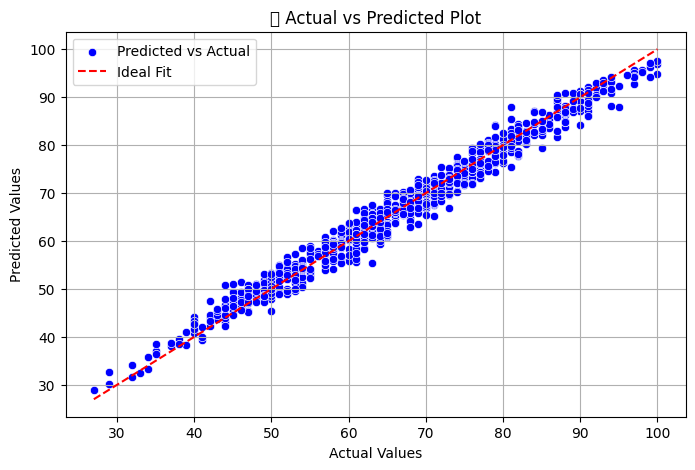

📊 Evaluating Test Performance 🔍

        📊 Model Evaluation Metrics        
                                 ╷         
  Metric                         │ Value   
 ════════════════════════════════╪════════ 
  Mean Absolute Error (MAE)      │ 4.6882  
  Root Mean Squared Error (RMSE) │ 6.0274  
  R² Score                       │ 0.8327  
                                 ╵

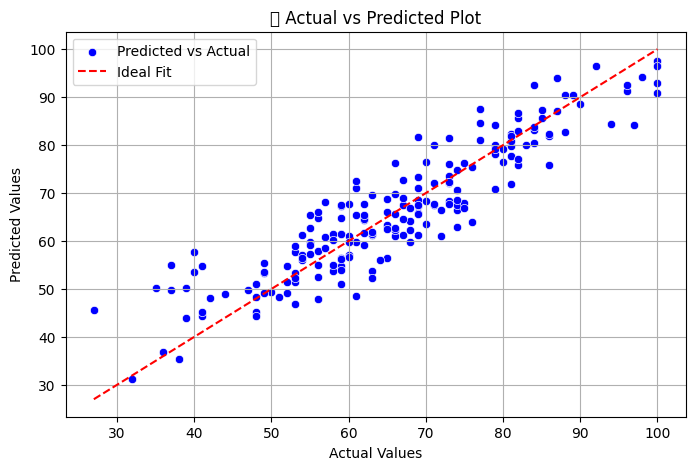

  📌 Model Performance: Random Forest  
               Regressor               
           ╷             ╷             
  Metric   │ Train Value │ Test Value  
 ══════════╪═════════════╪════════════ 
  MAE      │ 1.7982      │ 4.6882      
  RMSE     │ 2.2436      │ 6.0274      
  R² Score │ 0.9751      │ 0.8327      
           ╵             ╵

✅ Model Evaluation Complete! 🎯

==================================================

🛠️ Training Model: XGBRegressor 🚀

📊 Evaluating Training Performance 🔍

        📊 Model Evaluation Metrics        
                                 ╷         
  Metric                         │ Value   
 ════════════════════════════════╪════════ 
  Mean Absolute Error (MAE)      │ 0.5487  
  Root Mean Squared Error (RMSE) │ 0.8746  
  R² Score                       │ 0.9962  
                                 ╵

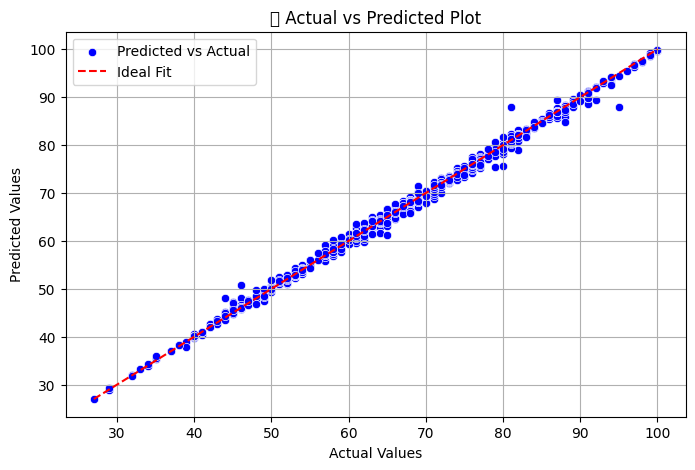

📊 Evaluating Test Performance 🔍

        📊 Model Evaluation Metrics        
                                 ╷         
  Metric                         │ Value   
 ════════════════════════════════╪════════ 
  Mean Absolute Error (MAE)      │ 5.1788  
  Root Mean Squared Error (RMSE) │ 6.6479  
  R² Score                       │ 0.7965  
                                 ╵

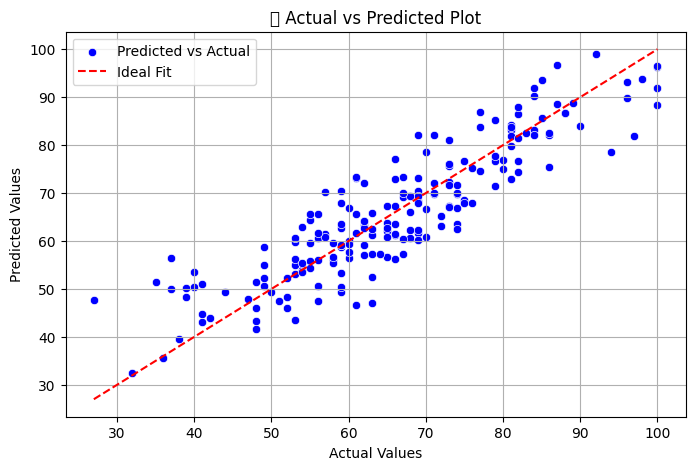

  📌 Model Performance: XGBRegressor   
           ╷             ╷             
  Metric   │ Train Value │ Test Value  
 ══════════╪═════════════╪════════════ 
  MAE      │ 0.5487      │ 5.1788      
  RMSE     │ 0.8746      │ 6.6479      
  R² Score │ 0.9962      │ 0.7965      
           ╵             ╵

✅ Model Evaluation Complete! 🎯

==================================================

🛠️ Training Model: CatBoosting Regressor 🚀

📊 Evaluating Training Performance 🔍

        📊 Model Evaluation Metrics        
                                 ╷         
  Metric                         │ Value   
 ════════════════════════════════╪════════ 
  Mean Absolute Error (MAE)      │ 2.2347  
  Root Mean Squared Error (RMSE) │ 2.8968  
  R² Score                       │ 0.9585  
                                 ╵

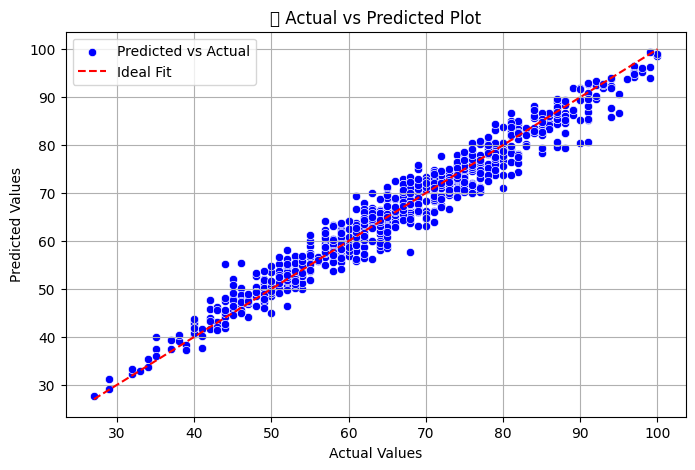

📊 Evaluating Test Performance 🔍

        📊 Model Evaluation Metrics        
                                 ╷         
  Metric                         │ Value   
 ════════════════════════════════╪════════ 
  Mean Absolute Error (MAE)      │ 4.7985  
  Root Mean Squared Error (RMSE) │ 6.0236  
  R² Score                       │ 0.8329  
                                 ╵

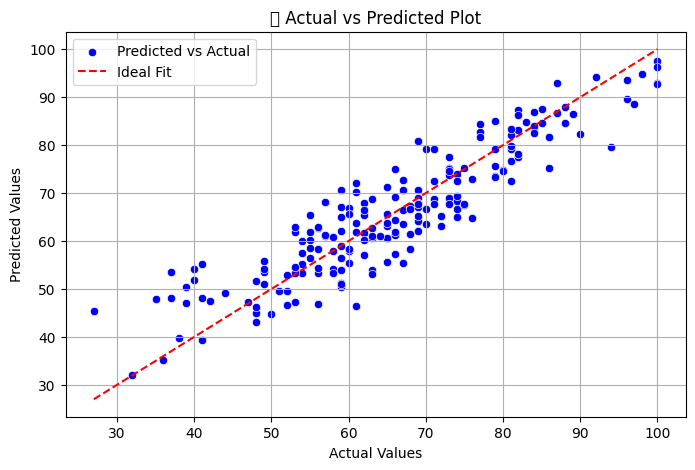

   📌 Model Performance: CatBoosting   
               Regressor               
           ╷             ╷             
  Metric   │ Train Value │ Test Value  
 ══════════╪═════════════╪════════════ 
  MAE      │ 2.2347      │ 4.7985      
  RMSE     │ 2.8968      │ 6.0236      
  R² Score │ 0.9585      │ 0.8329      
           ╵             ╵

✅ Model Evaluation Complete! 🎯

==================================================

🛠️ Training Model: AdaBoost Regressor 🚀

📊 Evaluating Training Performance 🔍

        📊 Model Evaluation Metrics        
                                 ╷         
  Metric                         │ Value   
 ════════════════════════════════╪════════ 
  Mean Absolute Error (MAE)      │ 4.7141  
  Root Mean Squared Error (RMSE) │ 5.7587  
  R² Score                       │ 0.8361  
                                 ╵

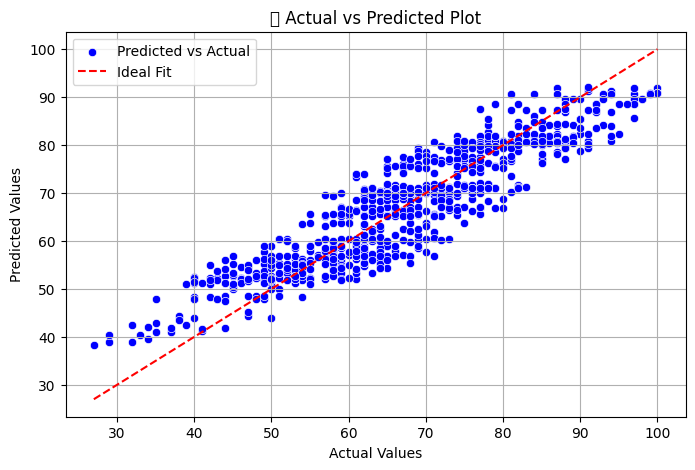

📊 Evaluating Test Performance 🔍

        📊 Model Evaluation Metrics        
                                 ╷         
  Metric                         │ Value   
 ════════════════════════════════╪════════ 
  Mean Absolute Error (MAE)      │ 4.8595  
  Root Mean Squared Error (RMSE) │ 6.3164  
  R² Score                       │ 0.8163  
                                 ╵

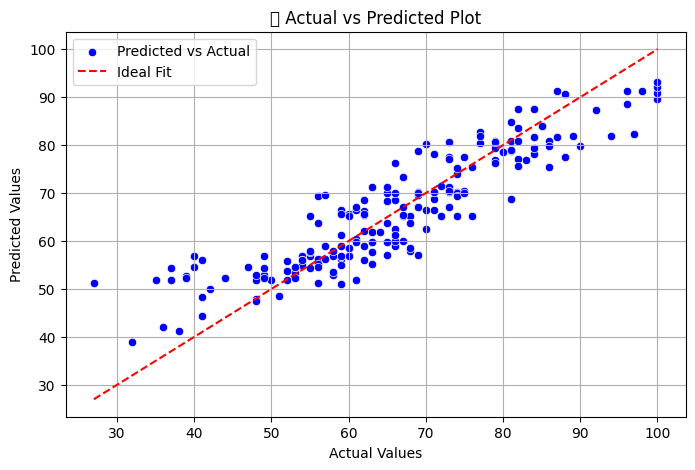

    📌 Model Performance: AdaBoost     
               Regressor               
           ╷             ╷             
  Metric   │ Train Value │ Test Value  
 ══════════╪═════════════╪════════════ 
  MAE      │ 4.7141      │ 4.8595      
  RMSE     │ 5.7587      │ 6.3164      
  R² Score │ 0.8361      │ 0.8163      
           ╵             ╵

✅ Model Evaluation Complete! 🎯

==================================================

🎯 Model Performance Summary 📊

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from rich.console import Console
from rich.table import Table
from rich import box

console = Console()

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list = []

# Loop through models
for name, model in models.items():
    console.print(f"\n🛠️ Training Model: [bold cyan]{name}[/bold cyan] 🚀", style="bold")

    # Train model
    model.fit(X_train, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    console.print("\n📊 Evaluating Training Performance 🔍", style="bold green")
    train_mae, train_rmse, train_r2 = evaluate_model(y_train, y_train_pred)

    console.print("\n📊 Evaluating Test Performance 🔍", style="bold red")
    test_mae, test_rmse, test_r2 = evaluate_model(y_test, y_test_pred)

    # Store results
    model_list.append(name)
    r2_list.append(test_r2)

    # Display results in a rich table
    table = Table(title=f"📌 Model Performance: {name}", box=box.MINIMAL_DOUBLE_HEAD)
    table.add_column("Metric", style="bold cyan")
    table.add_column("Train Value", style="bold green")
    table.add_column("Test Value", style="bold red")

    table.add_row("MAE", f"{train_mae:.4f}", f"{test_mae:.4f}")
    table.add_row("RMSE", f"{train_rmse:.4f}", f"{test_rmse:.4f}")
    table.add_row("R² Score", f"{train_r2:.4f}", f"{test_r2:.4f}")

    console.print(table)
    console.print("✅ [bold yellow]Model Evaluation Complete![/bold yellow] 🎯", style="bold")
    console.print("=" * 50 + "\n", style="bold magenta")

# Summary of all models
console.print("\n🎯 [bold cyan]Model Performance Summary[/bold cyan] 📊", style="bold")
summary_table = Table(title="📌 Model R² Scores on Test Data", box=box.MINIMAL_DOUBLE_HEAD)
summary_table.add_column("Model Name", style="bold cyan")


### 📊 Results

In [23]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,Linear Regression,0.858711
2,Ridge,0.858516
7,CatBoosting Regressor,0.842494
5,Random Forest Regressor,0.820371
8,AdaBoost Regressor,0.811470
6,XGBRegressor,0.799663
1,Lasso,0.765253
3,K-Neighbors Regressor,0.763470
4,Decision Tree,0.688650


In [ ]:
import pandas as pd
import plotly.express as px
from rich.console import Console
from rich.table import Table
from rich import box

console = Console()

# Create DataFrame
df_results = pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score'])
df_results = df_results.sort_values(by=["R2_Score"], ascending=False)

# Display Interactive Table with Rich
table = Table(title="📊 Model Performance Ranking", box=box.MINIMAL_DOUBLE_HEAD)
table.add_column("Rank", style="bold yellow")
table.add_column("Model Name", style="bold cyan")
table.add_column("R² Score", style="bold green")

for i, row in enumerate(df_results.itertuples(), 1):
    table.add_row(str(i), row._1, f"{row.R2_Score:.4f}")

console.print(table)

# Create Interactive Bar Plot using Plotly
fig = px.bar(df_results, x="Model Name", y="R2_Score",
             text="R2_Score", title="📊 Model Performance Comparison",
             color="R2_Score", color_continuous_scale="blues")

# fig.update_traces(texttemplate='%{text:.4f}', textposition='outside')
# fig.update_layout(xaxis_title="Models", yaxis_title="R² Score", xaxis_tickangle=-45)




        📊 Model Performance Ranking         
       ╷                         ╷           
  Rank │ Model Name              │ R² Score  
 ══════╪═════════════════════════╪══════════ 
  1    │ Ridge                   │ 0.8571    
  2    │ Linear Regression       │ 0.8569    
  3    │ CatBoosting Regressor   │ 0.8329    
  4    │ Random Forest Regressor │ 0.8327    
  5    │ AdaBoost Regressor      │ 0.8163    
  6    │ XGBRegressor            │ 0.7965    
  7    │ Lasso                   │ 0.7912    
  8    │ K-Neighbors Regressor   │ 0.7792    
  9    │ Decision Tree           │ 0.7146    
       ╵                         ╵

####  Opens interactive plot in a new browser tab

In [57]:
fig.update_traces(texttemplate='%{text:.4f}', textposition='outside')
fig.update_layout(xaxis_title="Models", yaxis_title="R² Score", xaxis_tickangle=-45)
fig.show(renderer="browser")  # Opens interactive plot in a new browser tab


## Linear Regression

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Train Model
lin_model = LinearRegression(fit_intercept=True)
lin_model.fit(X_train, y_train)

# Make Predictions
y_pred = lin_model.predict(X_test)

# Calculate R² Score
score = r2_score(y_test, y_pred) * 100

# Display Result with Better Formatting & Emoji 🎯
print("📊 Model: Linear Regression")
print(f"✅ Accuracy of the model: {score:.2f}%")


📊 Model: Linear Regression
✅ Accuracy of the model: 85.69%


### 📈 Plot: y_pred vs y_test

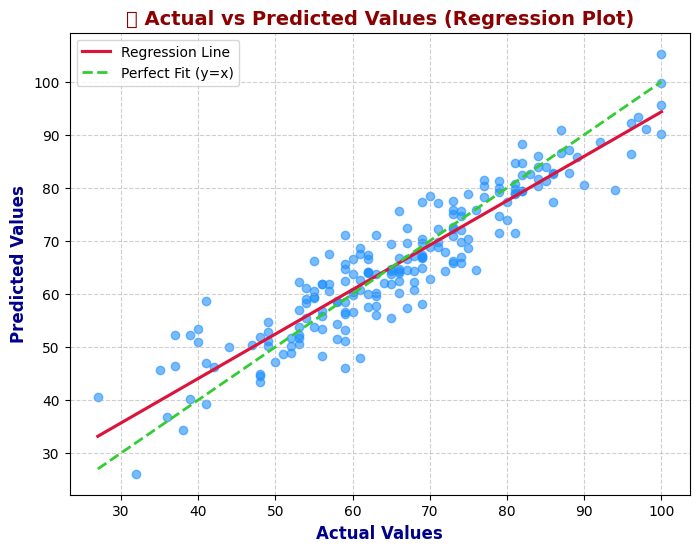

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set Figure Size
plt.figure(figsize=(8, 6))

# Scatter Plot for Actual vs Predicted
sns.regplot(x=y_test, y=y_pred, ci=None, 
            scatter_kws={'color': 'dodgerblue', 'alpha': 0.6, 'label': "Predicted Values (y_pred)"},
            line_kws={'color': 'crimson', 'label': "Regression Line"})

# Add Perfect Prediction Line (y = x)
x_range = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x_range, x_range, color="limegreen", linestyle="dashed", linewidth=2, label="Perfect Fit (y=x)")

# Labels, Title, and Grid
plt.xlabel("Actual Values", fontsize=12, fontweight="bold", color="darkblue")
plt.ylabel("Predicted Values", fontsize=12, fontweight="bold", color="darkblue")
plt.title("📊 Actual vs Predicted Values (Regression Plot)", fontsize=14, fontweight="bold", color="darkred")

# Add Legend
plt.legend()

# Add Grid
plt.grid(True, linestyle="--", alpha=0.6)

# Show the Plot
plt.show()


### Perfect Fit Line (y = x) 🟢
A reference line that represents a perfect model where actual values = predicted values.

### Regression Line 🔴
A line fitted by the regression model to best describe the relationship between actual and predicted values.

### 🔍 Difference between Actual & Predicted Values

In [73]:
import pandas as pd

# Create DataFrame
pred_df = pd.DataFrame({
    'Actual Value': y_test,
    'Predicted Value': y_pred,
    'Difference': y_test - y_pred
})

# Show only first 10 rows
pred_df.head(10)

,Actual Value,Predicted Value,Difference
623,100.0,90.119692,9.880308
458,100.0,95.663525,4.336475
741,37.0,46.381255,-9.381255
443,73.0,70.935881,2.064119
280,53.0,52.174478,0.825522
590,58.0,58.701427,-0.701427
717,96.0,86.284507,9.715493
304,74.0,69.865147,4.134853
728,73.0,75.147884,-2.147884
502,63.0,59.642936,3.357064


In [77]:
import pandas as pd

# Create DataFrame
pred_df = pd.DataFrame({
    'Actual Value': y_test,
    'Predicted Value': y_pred,
    'Difference': y_test - y_pred
})

# Show only first 10 rows
pred = pred_df.head(10)


# Apply Styling
styled_pred_df = pred.style \
    .background_gradient(subset=['Actual Value'], cmap='Greens') \
    .background_gradient(subset=['Predicted Value'], cmap='Blues') \
    .background_gradient(subset=['Difference'], cmap='Reds') \
    .set_properties(**{'text-align': 'center', 'border': '1px solid black'}) \
    .set_caption("📊 **Actual vs Predicted Values with Differences**")

styled_pred_df


,Actual Value,Predicted Value,Difference
623,100.000000,90.119692,9.880308
458,100.000000,95.663525,4.336475
741,37.000000,46.381255,-9.381255
443,73.000000,70.935881,2.064119
280,53.000000,52.174478,0.825522
590,58.000000,58.701427,-0.701427
717,96.000000,86.284507,9.715493
304,74.000000,69.865147,4.134853
728,73.000000,75.147884,-2.147884
502,63.000000,59.642936,3.357064


### ✅ Final Insights:
- 🔹 If the difference is small, the model is performing well! 🎯
- 🔹 If the gap is large, we may need to tune hyperparameters or try another model! 🔄

### 📌 Next Steps:
- 🔹 Fine-tune hyperparameters 🔄
- 🔹 Try different models 🤖
- 🔹 Improve feature selection 📊